/work/Walmart_analysis
  0%|                                               | 0.00/3.36M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.36M/3.36M [00:00<00:00, 90.2MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     object
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   object        
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 no

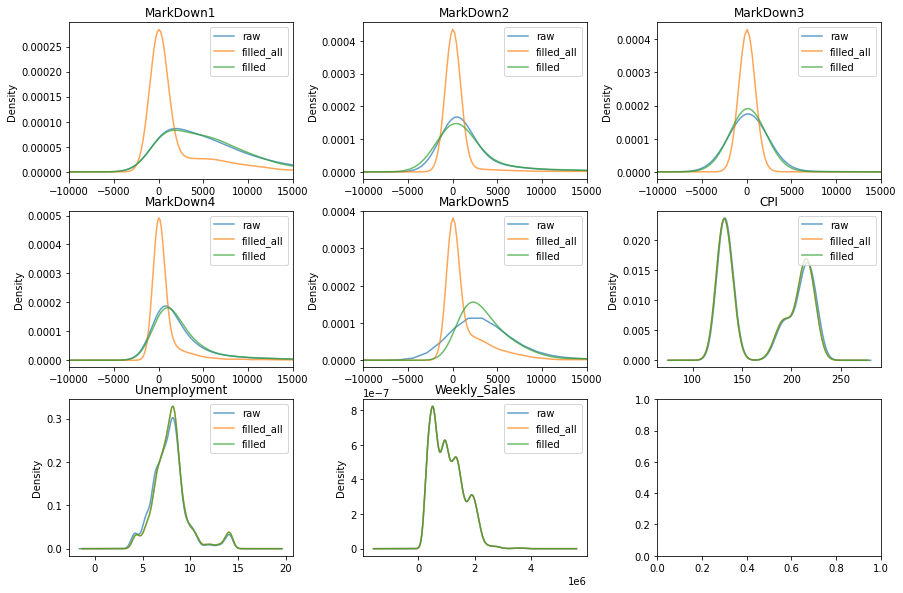

/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

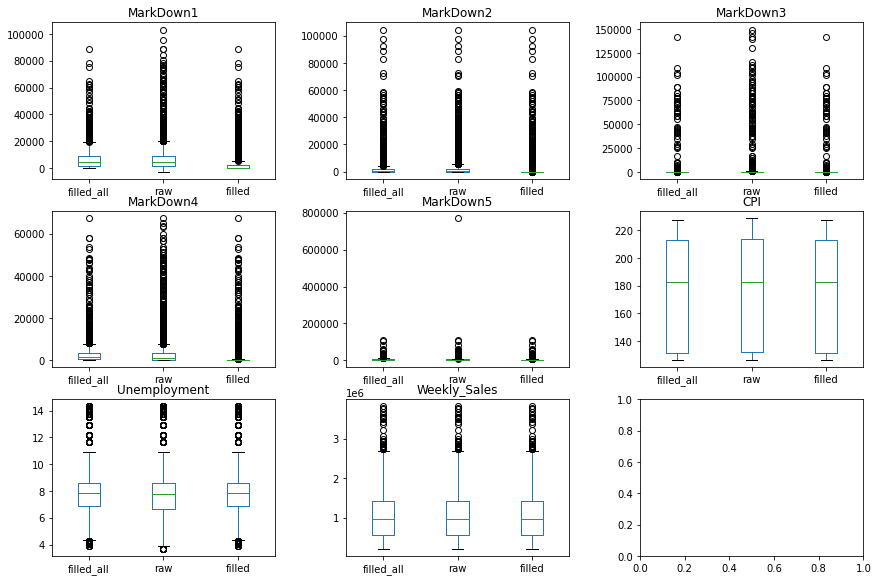

/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

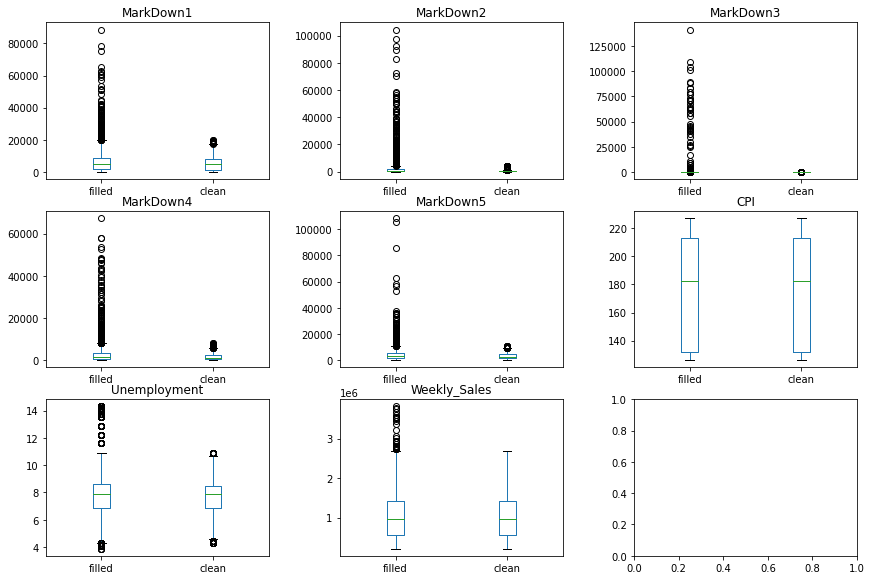

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   MarkDown1     2142 non-null   float64       
 5   MarkDown2     1368 non-null   float64       
 6   MarkDown3     1772 non-null   float64       
 7   MarkDown4     1777 non-null   float64       
 8   MarkDown5     2184 non-null   float64       
 9   CPI           6435 non-null   float64       
 10  Unemployment  5954 non-null   float64       
 11  IsHoliday     6435 non-null   bool          
 12  Type          6435 non-null   object        
 13  Size          6435 non-null   int64         
 14  Weekly_Sales  6401 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64

In [ ]:
%run 0.0-thomas-data_processing.ipynb

# data exploration

## general

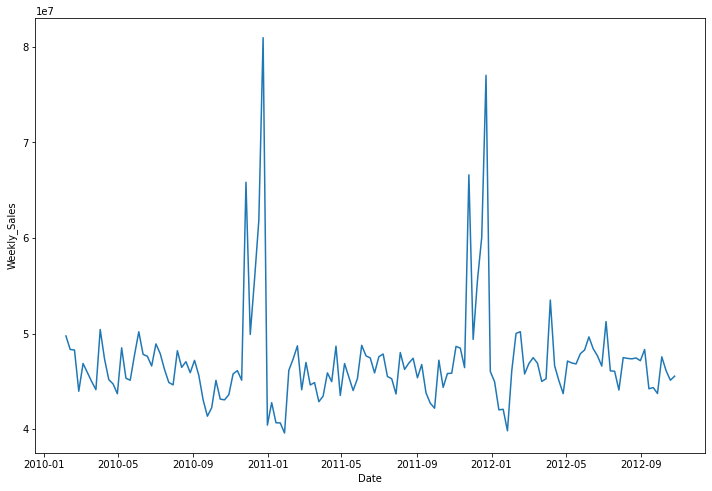

In [ ]:
total_week_sales = train.groupby(['Date'])[['Weekly_Sales']].sum().reset_index()

plt.figure(figsize=(12,8))
sns.lineplot(data=total_week_sales,x='Date',y='Weekly_Sales')

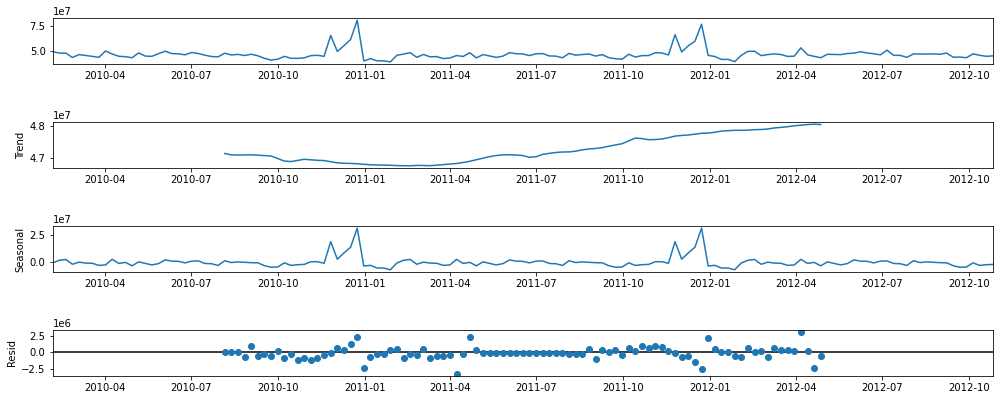

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose as sm

data = total_week_sales[['Date','Weekly_Sales']].set_index('Date') 

sesonal_decompuse = sm(data, model='additive')
fig = sesonal_decompuse.plot()
fig.set_size_inches((16, 6))

in the lats moth of the years the revenue increases probably, beacuase festive events

In [ ]:
def min_max_scaler(series):
    x_min = series.min()
    x_max = series.max()

    scaler = lambda x: (x-x_min)/(x_max-x_min)
    return series.apply(scaler)


<ipython-input-91-40a3d6f0b2de>:10: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x7ff11ec1ffa0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(['sum_sales','_','not_holiday','holiday'])


Text(0.5, 1.0, 'sales and their sum in time (not at scale)')

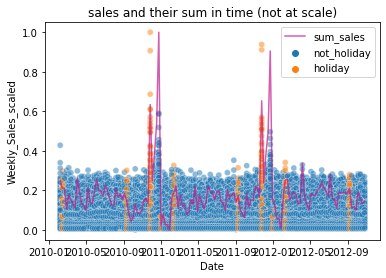

In [ ]:
data = train
data['IsHoliday_value'] = pd.get_dummies(data['IsHoliday'],drop_first=True).replace({0:'not_holiday',1:'holiday'})
data['Weekly_Sales_scaled'] = min_max_scaler(data['Weekly_Sales'])

total_week_sales['Weekly_Sales_scaled'] = min_max_scaler(total_week_sales['Weekly_Sales'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Date',y='Weekly_Sales_scaled',hue='IsHoliday_value',alpha=0.5)
sns.lineplot(data=total_week_sales,x='Date',y='Weekly_Sales_scaled',color='#bf1a8b',alpha=0.7)

plt.legend(['sum_sales','_','not_holiday','holiday'])
plt.title('sales and their sum in time (not at scale)')

- there are 2 major holidays that skiroket the sales in the same last part of the year
    - probably crismass and new year
- other holidays seems to reduce the sales after they had happened 
- a few don't apear to have effect at all 

Text(0.5, 1.0, 'total sales of stores')

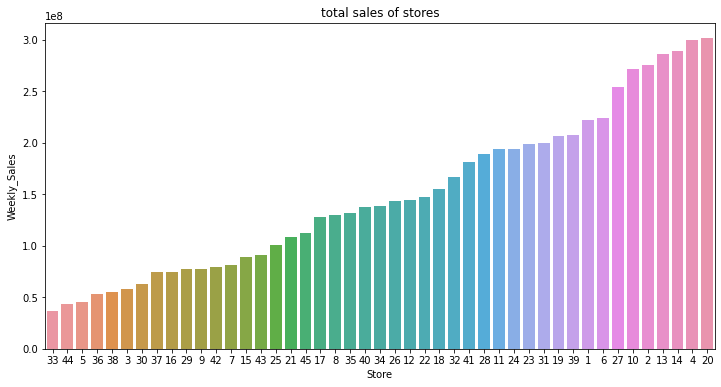

In [ ]:
data = train[['Store','Weekly_Sales']].groupby('Store').sum().sort_values('Weekly_Sales')

plt.figure(figsize=(12,6))
sns.barplot(x=data.index,order=data.index,y=data['Weekly_Sales'])
plt.title('total sales of stores')

## correlations

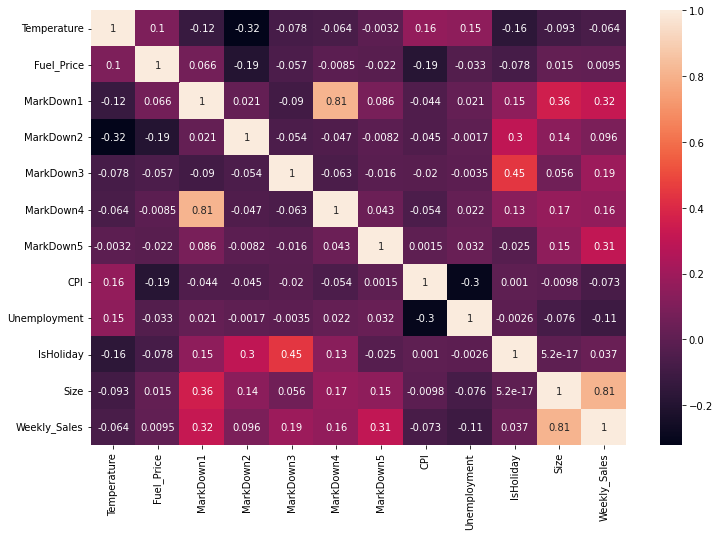

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_raw.corr(),annot=True)

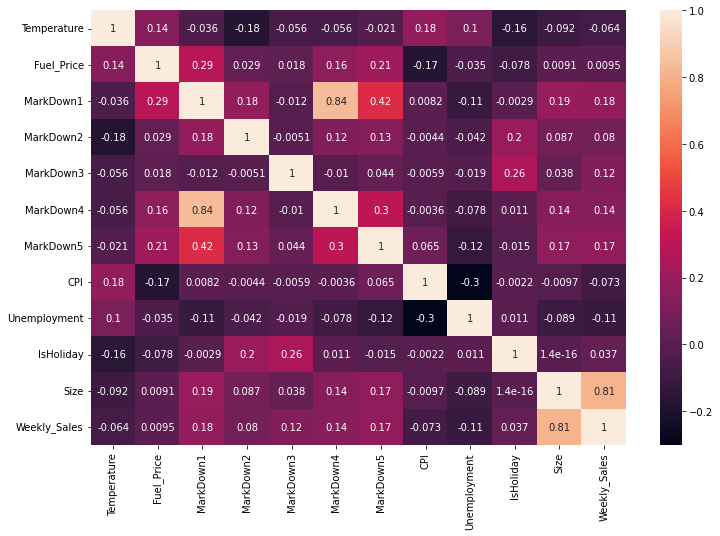

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_filled_all.corr(),annot=True)

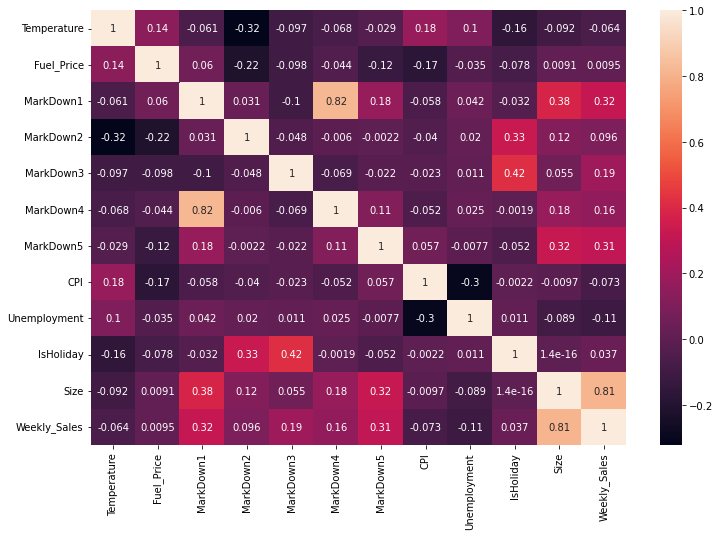

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_filled.corr(),annot=True)

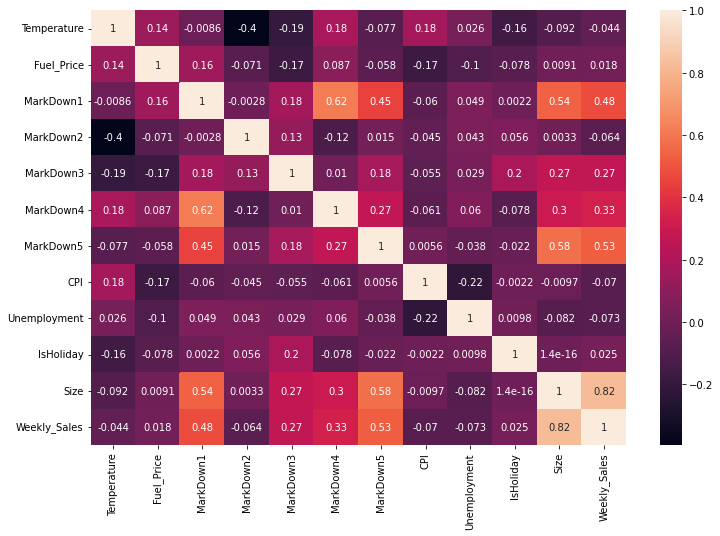

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(),annot=True)

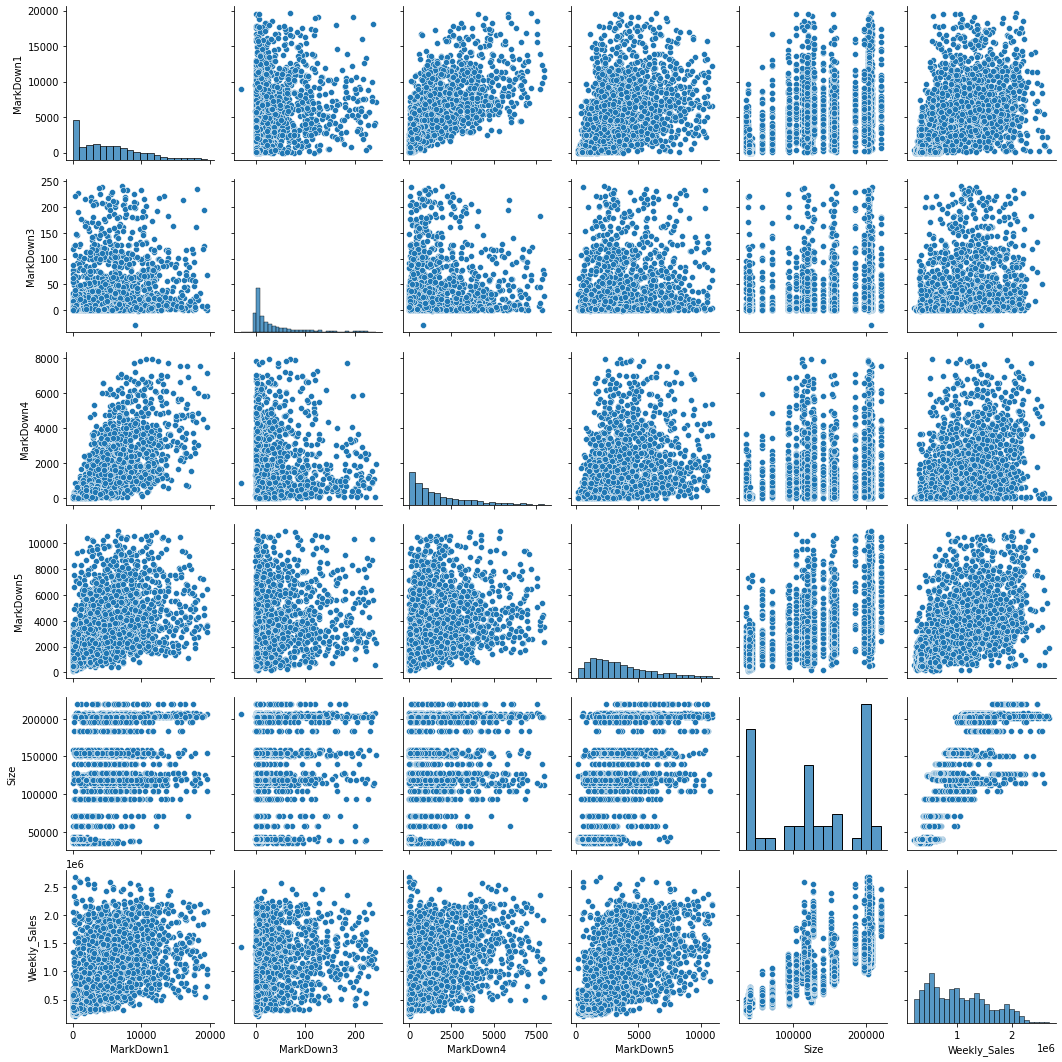

In [ ]:
columns = (abs(df_clean.corr()['Weekly_Sales']) >= 0.2)
columns = columns[columns].index #take just the true values
sns.pairplot(df_clean[columns])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=740c3fbb-6503-48b5-8790-fc69ebaa42e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>